# **Baltimore Homicide Statistics**

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv('baltimore-homicide-victims.csv')
df.head()

,id,first_name,last_name,age,gender,race,cause,death_loc,district,street_address,zip_code,latitude,longitude,date,time,notes
0,3298,Gregory,Sinclair,31.0,male,black,shooting,unknown,SE,2300 Fleet St,21224,39.285140,-76.584100,2019-01-12,19:29:00,<p>Sinclair was shot after allegedly holding u...
1,3402,Name not yet released,NaN,NaN,female,unknown,unknown,unknown,NW,3901 Clarks Lane,21215,39.358600,-76.702790,2019-05-12,15:48:00,"<p>On May 12, 2019 at approximately 3:48 p.m.,..."
2,3417,Andre,Davis,25.0,male,unknown,unknown,unknown,ND,500 E 26th Street,21218,39.319180,-76.609010,2019-05-31,NaN,"<p>On May 25, 2019 at approximately 9:26 a.m.,..."
3,3459,Name not yet released,NaN,NaN,male,hispanic,shooting,scene,NE,4700 Loch Raven Blvd,21239,39.347950,-76.592300,2019-07-11,04:50:00,"<p>Morgan State Police were called for a ""non-..."
4,3487,Malachi,Lawson,4.0,male,black,unknown,scene,NW,5500 Haddon Ave,21207,39.336441,-76.702588,2019-08-03,04:45:00,NaN


## Dataset info

- ### Dataset size and basic stats

In [3]:
print('Data :\n')
print(f'- Rows : {df.shape[0]}')
print(f'- Col : {df.shape[1]}\n')

print('Data info :\n')
print(df.info())

print('\n Basic stats :\n')
display(df.describe(include='all'))

Data :

- Rows : 4291
- Col : 16

Data info :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4291 non-null   int64  
 1   first_name      4241 non-null   object 
 2   last_name       4236 non-null   object 
 3   age             4248 non-null   float64
 4   gender          4291 non-null   object 
 5   race            4291 non-null   object 
 6   cause           4291 non-null   object 
 7   death_loc       4291 non-null   object 
 8   district        4291 non-null   object 
 9   street_address  4291 non-null   object 
 10  zip_code        4291 non-null   int64  
 11  latitude        4291 non-null   float64
 12  longitude       4291 non-null   float64
 13  date            4291 non-null   object 
 14  time            3797 non-null   object 
 15  notes           1178 non-null   object 
dtypes: float64(3), int64(2), object

,id,first_name,last_name,age,gender,race,cause,death_loc,district,street_address,zip_code,latitude,longitude,date,time,notes
count,4291.000000,4241,4236,4248.000000,4291,4291,4291,4291,4291,4291,4291.000000,4291.000000,4291.000000,4291,3797,1178
unique,NaN,1698,1850,NaN,3,5,6,13,10,3238,NaN,NaN,NaN,2875,989,985
top,NaN,Michael,Johnson,NaN,male,black,shooting,unknown,WD,800 W Lexington St,NaN,NaN,NaN,2020-02-10,23:00:00,<p>Double shooting</p>
freq,NaN,73,114,NaN,3847,3320,3623,2210,661,13,NaN,NaN,NaN,7,56,60
mean,2233.975297,NaN,NaN,31.095810,NaN,NaN,NaN,NaN,NaN,NaN,21217.170823,39.307363,-76.626473,NaN,NaN,NaN
std,1283.968259,NaN,NaN,12.486282,NaN,NaN,NaN,NaN,NaN,NaN,9.016661,0.026870,0.041019,NaN,NaN,NaN
min,2.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,21012.000000,39.216520,-76.711296,NaN,NaN,NaN
25%,1117.500000,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,21213.000000,39.292569,-76.659587,NaN,NaN,NaN
50%,2253.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,21217.000000,39.306540,-76.630851,NaN,NaN,NaN
75%,3352.500000,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,21223.000000,39.323110,-76.594773,NaN,NaN,NaN


## Clean Data

- ### Missing values

In [4]:
# Missing values on new dataframe
data = {
    'count' : df.isna().sum().sort_values(ascending=False),
    'perc' : (round(df.isna().sum().sort_values(ascending=False)/len(df), 2)*100)
}

nan = pd.DataFrame(data)

print('Missing values :')
display(nan[nan['count'] != 0])

Missing values :


,count,perc
notes,3113,73.0
time,494,12.0
last_name,55,1.0
first_name,50,1.0
age,43,1.0


In [5]:
# Drop column 'notes'
df = df.drop(columns='notes')

# Drop rows with missing time values
df = df[df['time'].notna()]

# Fill nan
df['age'] = df['age'].fillna(df['age'].median())
df['last_name'] = df['last_name'].fillna('unknown')
df['first_name'] = df['first_name'].fillna('unknown')

# Check for missing values
print(df.isna().any())

id                False
first_name        False
last_name         False
age               False
gender            False
race              False
cause             False
death_loc         False
district          False
street_address    False
zip_code          False
latitude          False
longitude         False
date              False
time              False
dtype: bool


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3797 entries, 0 to 4290
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3797 non-null   int64  
 1   first_name      3797 non-null   object 
 2   last_name       3797 non-null   object 
 3   age             3797 non-null   float64
 4   gender          3797 non-null   object 
 5   race            3797 non-null   object 
 6   cause           3797 non-null   object 
 7   death_loc       3797 non-null   object 
 8   district        3797 non-null   object 
 9   street_address  3797 non-null   object 
 10  zip_code        3797 non-null   int64  
 11  latitude        3797 non-null   float64
 12  longitude       3797 non-null   float64
 13  date            3797 non-null   object 
 14  time            3797 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 474.6+ KB


- ### Date format

In [7]:
# Combine date and time columns then convert to datetime
df['date' ] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Drop time column
df = df.drop(columns='time')

print('New date column :')
df['date']

New date column :


0      2019-01-12 19:29:00
1      2019-05-12 15:48:00
3      2019-07-11 04:50:00
4      2019-08-03 04:45:00
5      2019-08-07 21:10:00
               ...        
4286   2007-01-05 02:20:00
4287   2007-01-03 14:00:00
4288   2007-01-02 18:30:00
4289   2007-01-02 14:48:00
4290   2007-01-01 18:45:00
Name: date, Length: 3797, dtype: datetime64[ns]

In [8]:
# Insert new columns from date
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek +1
df['dayofyear'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

df.head()

,id,first_name,last_name,age,gender,race,cause,death_loc,district,street_address,zip_code,latitude,longitude,date,hour,dayofweek,dayofyear,month,year
0,3298,Gregory,Sinclair,31.0,male,black,shooting,unknown,SE,2300 Fleet St,21224,39.285140,-76.584100,2019-01-12 19:29:00,19,6,12,1,2019
1,3402,Name not yet released,unknown,28.0,female,unknown,unknown,unknown,NW,3901 Clarks Lane,21215,39.358600,-76.702790,2019-05-12 15:48:00,15,7,132,5,2019
3,3459,Name not yet released,unknown,28.0,male,hispanic,shooting,scene,NE,4700 Loch Raven Blvd,21239,39.347950,-76.592300,2019-07-11 04:50:00,4,4,192,7,2019
4,3487,Malachi,Lawson,4.0,male,black,unknown,scene,NW,5500 Haddon Ave,21207,39.336441,-76.702588,2019-08-03 04:45:00,4,6,215,8,2019
5,3498,Name not yet released,unknown,24.0,male,unknown,shooting,shock-trauma,WD,1100 Mosher St,21217,39.300124,-76.639528,2019-08-07 21:10:00,21,3,219,8,2019


In [9]:
# Insert month names
df['month'] = df['month'].apply(lambda x: 'January' if x == 1
                               else 'February' if x == 2
                               else 'March' if x == 3
                               else 'April' if x == 4
                               else 'May' if x == 5
                               else 'June' if x == 6
                               else 'July' if x == 7
                               else 'August' if x == 8
                               else 'September' if x == 9
                               else 'October' if x == 10
                               else 'November' if x == 11
                               else 'December')

In [10]:
# Sorted month names list 
months = [
    'January', 'February', 'March',
    'April','May','June',
    'July','August','September',
    'October','November','December'
]

# In order to sort data by month name
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

df['month']

0       January
1           May
3          July
4        August
5        August
         ...   
4286    January
4287    January
4288    January
4289    January
4290    January
Name: month, Length: 3797, dtype: category
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

In [11]:
# Insert day names
df['dayofweek'] = df['dayofweek'].apply(lambda x: 'Monday' if x == 1
                               else 'Tuesday' if x == 2
                               else 'Wednesday' if x == 3
                               else 'Thursday' if x == 4
                               else 'Friday' if x == 5
                               else 'Saturday' if x == 6
                               else 'Sunday')

In [12]:
days = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

# In order to sort data by month name
df['dayofweek'] = pd.Categorical(df['dayofweek'], categories=days, ordered=True)

df['dayofweek']

0        Saturday
1          Sunday
3        Thursday
4        Saturday
5       Wednesday
          ...    
4286       Friday
4287    Wednesday
4288      Tuesday
4289      Tuesday
4290       Monday
Name: dayofweek, Length: 3797, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

- ### Data types

In [13]:
# Convert float age values to int
df['age'] = df['age'].astype(int)

- ### Unique values

In [14]:
for i in df.columns:
    print('\n-----------\n')
    print(f'{i} unique values :')
    print()
    print(df[i].unique())


-----------

id unique values :

[3298 3402 3459 ...    4    3    2]

-----------

first_name unique values :

['Gregory' 'Name not yet released' 'Malachi' ... 'Gregory ' 'Yule'
 'Nelsene']

-----------

last_name unique values :

['Sinclair' 'unknown' 'Lawson' ... 'Canupp' 'MacKenney' 'Golf']

-----------

age unique values :

[31 28  4 24 54 49 76 23 39 19 20 26 59 40 22 18 25 15 34 53 33 41 36 50
 70 32 43 35 16 55 29 42 21 44 66 51 30 27 17 38 67 13 69 52 46 60 45 37
 47 62  6  8 48 64 57 61 68  0 56 58 14  3 72 73 74 65 97 63  1 79 83  2
 71  7 84 86 80  5 91 12 78]

-----------

gender unique values :

['male' 'female' 'unknown']

-----------

race unique values :

['black' 'unknown' 'hispanic' 'asian' 'white']

-----------

cause unique values :

['shooting' 'unknown' 'stabbing' 'bluntforce' 'other' 'asphyxiation']

-----------

death_loc unique values :

['unknown' 'scene' 'shock-trauma' 'johns-hopkins-hospital'
 'sinai-hospital' 'ummc' 'johns-hopkins-bayview' 'bon-secours-hos

In [15]:
# Check unkown gender values
df[df['gender'] == 'unknown']

,id,first_name,last_name,age,gender,race,cause,death_loc,district,street_address,zip_code,latitude,longitude,date,hour,dayofweek,dayofyear,month,year
198,4260,Reginald,White Jr.,35,unknown,black,shooting,unknown,CD,500 W Lafayette Ave,21217,39.302668,-76.629687,2021-10-01 15:45:00,15,Friday,274,October,2021
838,3599,Brandon,Geter,30,unknown,unknown,unknown,scene,SW,4300 Seminole Ave,21229,39.298784,-76.693814,2019-11-15 16:47:00,16,Friday,319,November,2019


In [16]:
# Replace 'uknown' values by 'male' since we can check for people names
df['gender'] = df['gender'].str.replace('unknown','male')

In [17]:
# Replace 'other' cause of death by 'unknown' because we have no clue about it
df['cause'] = df['cause'].str.replace('other', 'unknown')

# EDA

## Victims distribution

In [18]:
df['gender'].value_counts()

male      3441
female     356
Name: gender, dtype: int64

In [19]:
# This will return a dataframe with value counts and percentage from a column
def get_proportion(data, col_name):
    
    count = data[col_name].value_counts() 
    percentage =  round((data[col_name].value_counts(normalize=True)*100), 2)
    index = data[col_name].value_counts().index
    
    dic = {
        'count' : count,
        'percentage' : percentage
    }
    
    DataFrame = pd.DataFrame(dic,
                            index = index)
    
    return DataFrame.sort_values(by = 'percentage', ascending=True)

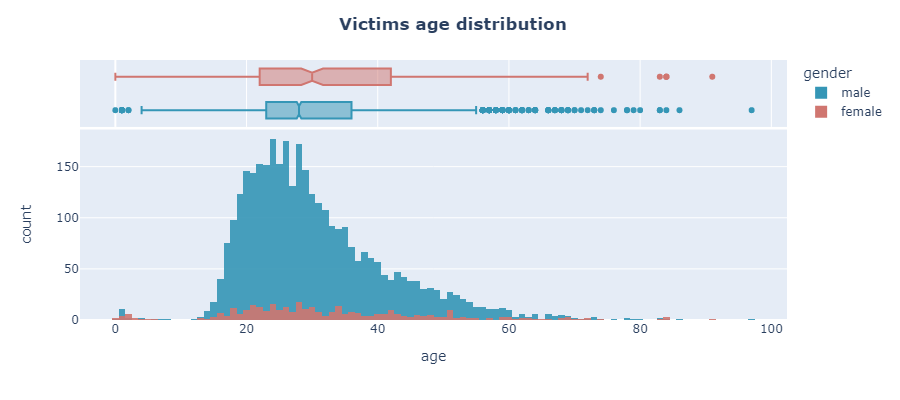

,count,percentage
female,356,9.38
male,3441,90.62


In [61]:
# Distribution of people age based on gender

fig = px.histogram(
    df[df['gender'] != 'unknown'],
    x="age",
    color="gender",
    marginal="box",
    hover_data=df.columns,
    barmode='overlay',
    color_discrete_sequence=['#3596b6', '#d07670'],
        opacity=.9
)

fig.update_layout(
    height=400,
    width=900,
    title='<b> Victims age distribution',
    title_x = 0.5
)

fig.show("png")

display(get_proportion(df, 'gender'))

- Most of the victims are men (90%)
- Most of the victims are between 20 and 40
- We can notice a few victims that are under 10..

## Analysis of homicide since 2007

In [21]:
def data_growth(data, col_year, col_cause):
    data_frame = pd.DataFrame(data.groupby(col_year)[col_cause].agg(['count'])).reset_index()
    
    # List of # homicide per year
    count = data_frame['count'].tolist()

    # Preparing growth rate list that has to start from 0
    growth = [0]

    # Get growth rate
    for i in range(1, len(count)):
        growth.append(round((count[i] - count[i-1]) / count[i-1] * 100, 1))

    data_frame['growth'] = growth

    return data_frame

In [64]:
data = data_growth(df, 'year', 'cause')
data.head().style.set_caption('Homicide total amount and growth through years since 2007')

,year,count,growth
0,2007,258,0.000000
1,2008,212,-17.800000
2,2009,197,-7.100000
3,2010,202,2.500000
4,2011,180,-10.900000


In [65]:
def growth_plot(data, title):
        # This will add + to annotation when growth is positive
    growth = data['growth'].tolist()
    text = []

    for i in growth:
        if i > 0:
            text.append('+%{text} %')
        elif i ==0:
            text.append(None)
        else:
            text.append('%{text} %')

    fig = px.line(data,
                 x='year',
                 y='count',
                 text='growth')

    fig.update_layout(height=400,
                     width=1000,
                     title=f'<b>{title}</b>',
                     title_x=0.5,
                     xaxis_title=None,
                     yaxis_title="Count")

    fig.update_traces(textposition='top center',
                     texttemplate= text
                     )


    fig.show("png")

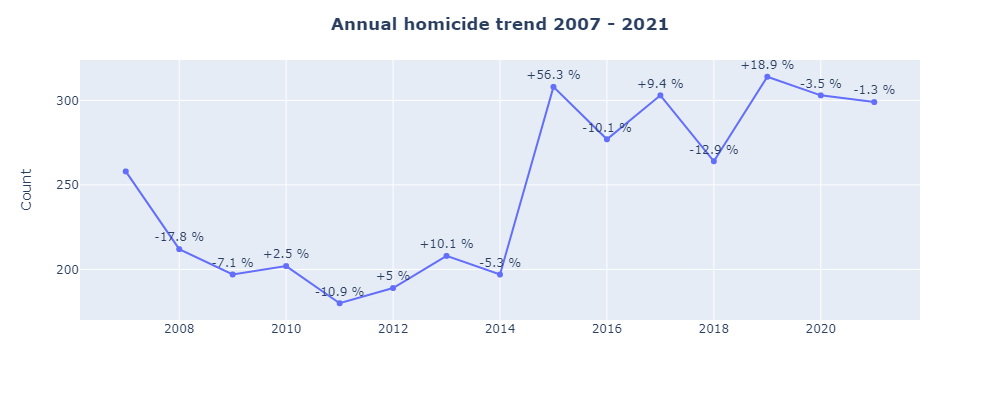

In [66]:
growth_plot(data[data['year'] != 2022], "Annual homicide trend 2007 - 2021")

In [25]:
data_list = []
for i in range(2012, 2023):
    data_list.append(df[df['year'] == i].groupby(['year','month'])['cause'].agg(['count']).reset_index())
    
for i in range(len(data_list)):
    data_list[i]['cumsum'] = data_list[i]['count'].cumsum()

data_list[:2]

[    year      month  count  cumsum
 0   2012    January      9       9
 1   2012   February     11      20
 2   2012      March     19      39
 3   2012      April     15      54
 4   2012        May     20      74
 5   2012       June     15      89
 6   2012       July     15     104
 7   2012     August     14     118
 8   2012  September     24     142
 9   2012    October     16     158
 10  2012   November     19     177
 11  2012   December     12     189,
     year      month  count  cumsum
 0   2013    January     13      13
 1   2013   February     15      28
 2   2013      March     20      48
 3   2013      April     17      65
 4   2013        May     17      82
 5   2013       June     22     104
 6   2013       July     19     123
 7   2013     August     14     137
 8   2013  September     18     155
 9   2013    October     16     171
 10  2013   November     20     191
 11  2013   December     17     208]

In [67]:
data = pd.concat(data_list)
data.head().style.set_caption('Cumulative sum of homicide by month since 2012')

,year,month,count,cumsum
0,2012,January,9,9
1,2012,February,11,20
2,2012,March,19,39
3,2012,April,15,54
4,2012,May,20,74


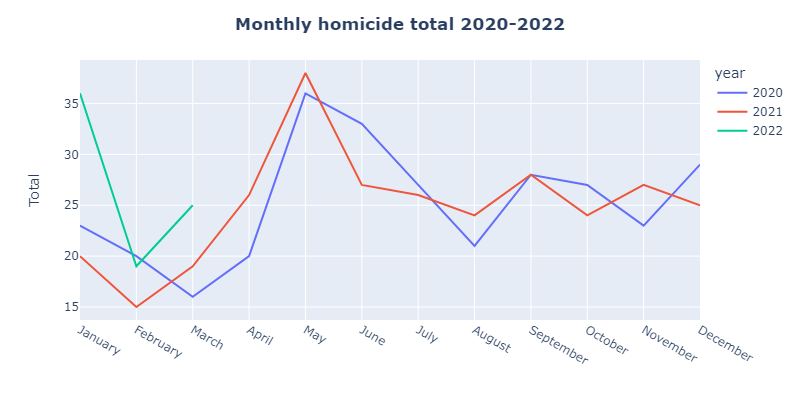

In [69]:
fig = px.line(
    data[data['year'] >= 2020][:-9],
    x='month',
    y='count',
    color='year'
)

fig.update_layout(
    height=400,
    width=800,
    title='<b>Monthly homicide total 2020-2022</b>',
    title_x=0.5,
    xaxis_title=None,
    yaxis_title="Total"
)

fig.update_traces(
    textposition='top center',
    texttemplate='%{text} %'
)

fig.show("png")

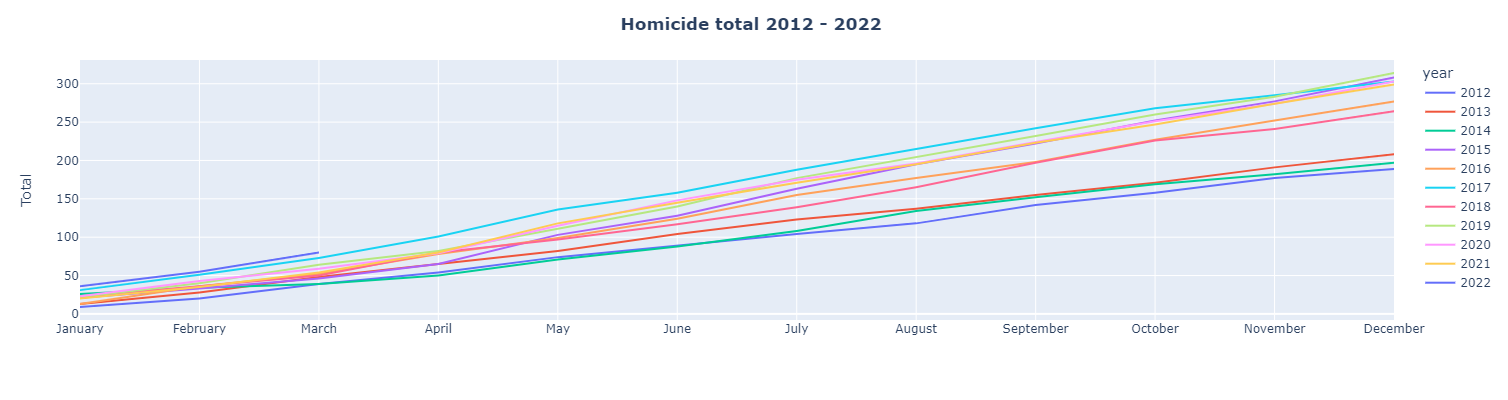

In [37]:
fig = px.line(
    data[:-9],
    x='month',
    y='cumsum',
    color='year'
)

fig.update_layout(
    height=400,
    width=800,
    title='<b>Homicide total 2012 - 2022 </b>',
    title_x=0.5,
    xaxis_title=None,
    yaxis_title="Total"
)

fig.update_traces(
    textposition='top center',
    texttemplate='%{text} %'
)

fig.show()

#fig.update_traces(line_shape='spline')

___________

In [70]:
def trend_count(data, col1, col2, col3):
    data_frame = data[data[col1] >= 2020].groupby([col1,col2])[col3].agg(['count']).reset_index()
    return data_frame
    

data = trend_count(df, 'year', 'dayofweek', 'cause')
data.head().style.set_caption('Daily homicide amount 2020 - 2022')

,year,dayofweek,count
0,2020,Monday,49
1,2020,Tuesday,35
2,2020,Wednesday,44
3,2020,Thursday,45
4,2020,Friday,38


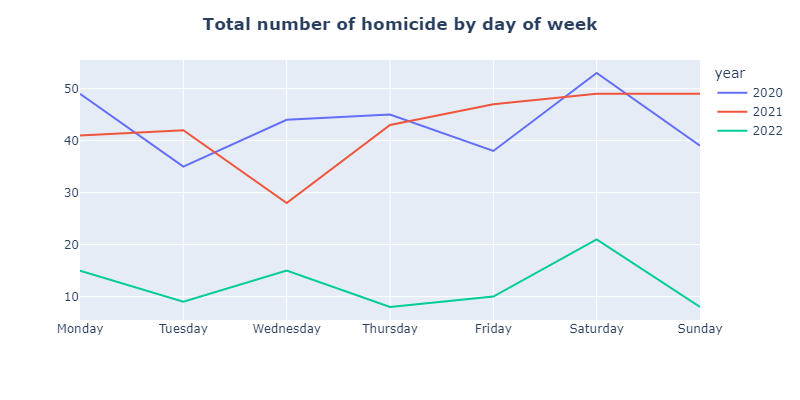

In [72]:
fig = px.line(
    data,
    x='dayofweek',
    y='count',
    color='year',
)

fig.update_layout(
    height=400,
    width=800,
    title='<b>Total number of homicide by day of week</b>',
    title_x = 0.5,
    xaxis_title=None,
    yaxis_title=None
)

fig.update_traces(textposition= 'top center')

fig.show("png")

In [73]:
data = trend_count(df, 'year', 'hour', 'cause')

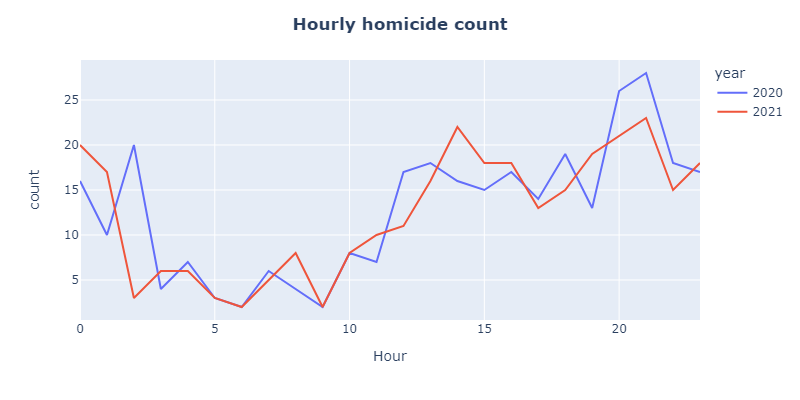

In [75]:
#data = df.groupby('hour')['cause'].agg(['count'])

fig = px.line(
    data[(data['year'] >= 2020) & (data['year'] < 2022)],
     x='hour',
     y='count',
    color='year'
)

fig.update_layout(
    height=400,
    width=800,
    title='<b>Hourly homicide count</b>',
    title_x = 0.5,
    xaxis_title='Hour'
)

fig.update_traces(textposition= 'top center')

fig.show("png")

In [76]:
homicide_count_2021 = data[data['year'] == 2021]['count'].sum()
homicide_count_2020 = data[data['year'] == 2020]['count'].sum()

print(f'Total homicide in 2021 : {homicide_count_2021}')
print(f'Total homicide in 2020 : {homicide_count_2020}')

Total homicide in 2021 : 299
Total homicide in 2020 : 303


We can notice that homicide count increase from 10 to 2 for both years

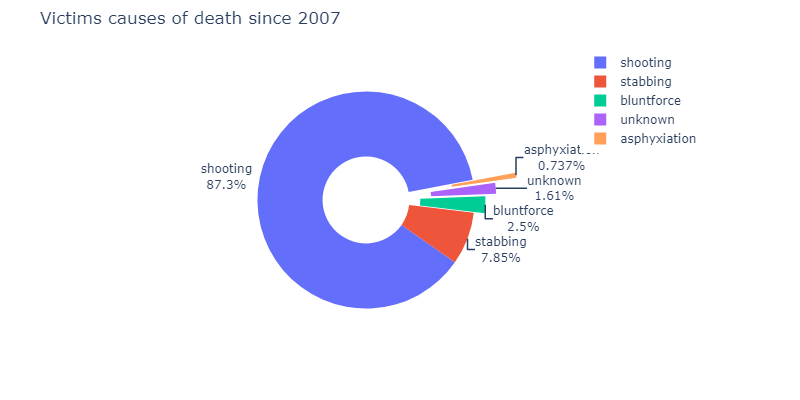

In [78]:
data = df['cause'].value_counts()

fig = px.pie(
    data,
    values=data.values,
    names=data.index,
    height=400,
    width=800
)

fig.update_layout(
    title='Victims causes of death since 2007',
    margin=dict(t=0, b=0, l=0, r=0)
)

fig.update_traces(
    textposition='outside',
    textinfo='percent+label',
    pull=[0, 0, .1, .2, .4],
    hole=.4,
    rotation = 125
)

fig.show("png")

In [79]:
data = df.groupby(['year', 'month', 'dayofweek'])['cause'].agg(['count']).reset_index()
data = data[data['count'] == data['count'].max()]

day = data['dayofweek'].values[0]
month = data['month'].values[0]
year = data['year'].values[0]

print(f'{year} {month} {day} is the deadliest day since 2007')

2021 May Sunday is the deadliest day since 2007


In [80]:
data = df.groupby(['year','month'])['cause'].agg(['count']).reset_index()
data = data[data['count'] == data['count'].max()]
year = data['year'].tolist()
month = data['month'].tolist()

print(f'{month[1]} {year[1]} is the deadliest month since 2007')

May 2021 is the deadliest month since 2007


In [81]:
data = df.groupby('year')['cause'].agg(['count']).reset_index()
year = data[data['count'] == data['count'].max()]['year'].values[0]

print(f'{year} is the deadliest year since 2007')

2019 is the deadliest year since 2007


____________

## Victims under 12

In [82]:
df_child = df[df['age'] < 12]

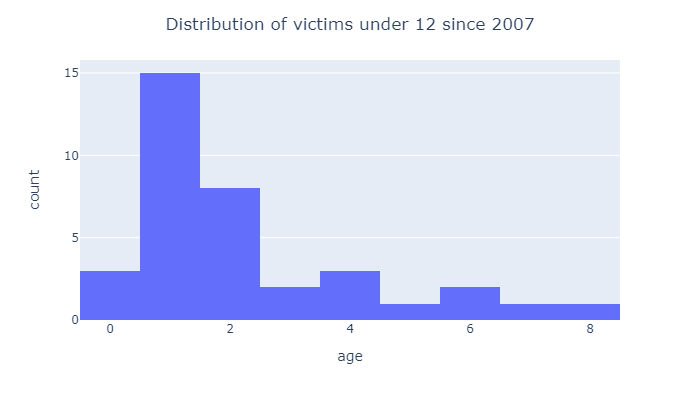

In [84]:
fig = px.histogram(
    df_child,
    x="age",
)

fig.update_layout(
    height=400,
    width=700,
    title='Distribution of victims under 12 since 2007',
    title_x=0.5
)

fig.show("png")

Most of the victims under 12 are 1 and 2 years old

___________________

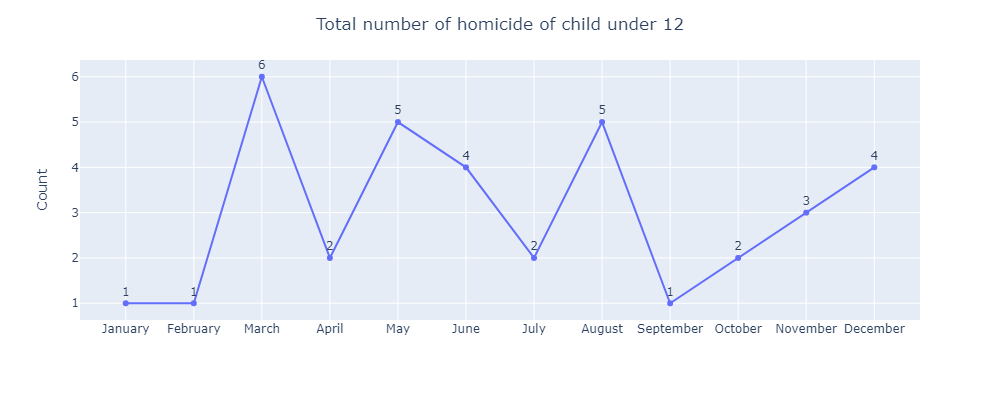

In [86]:
data = pd.DataFrame(df_child.groupby('month')['cause'].agg(['count'])).reset_index()

fig = px.line(
    data,
    x='month',
    y='count',
    text='count'

    )

fig.update_layout(
    height=400,
    width=1000,
    title='Total number of homicide of child under 12',
    title_x=0.5,
    xaxis_title=None,
    yaxis_title='Count'
)

fig.update_traces(textposition='top center')

fig.show("png")

- Year 2008 and 2012 had the highest number of child homicide with both 5 homicides

- Year 2015 is the beggining of a drop in homicide but number of homicide started increasing again in 2017, but this time less significativly.

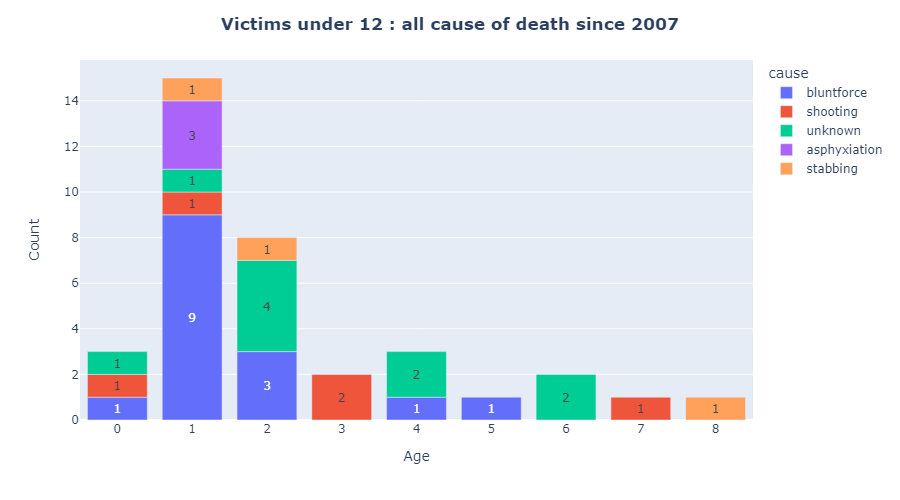

In [88]:
data = df_child.groupby(['age', 'cause'])['cause'].agg(['count']).reset_index()

fig = px.bar(
    data,
    x='age',
    y='count',
    color='cause',
    text='count'
)

fig.update_layout(
    height=500,
    width=900,
    title='<b>Victims under 12 : all cause of death since 2007</b>',
    title_x=0.5,
    xaxis_title='Age',
    yaxis_title='Count'
    
)

fig.update_traces(
    textposition='inside',
    insidetextanchor="middle"
)

fig.show("png")

As we saw before, 1 and 2 year old victims are highly represented in this dataset.

We also can notice that 1 year old victims are very often killed by bluntforce.

There are decent number of unknown cause of death...

In [89]:
df_child[['first_name', 'last_name', 'age', 'date', 'street_address', 'cause']]

,first_name,last_name,age,date,street_address,cause
4,Malachi,Lawson,4,2019-08-03 04:45:00,5500 Haddon Ave,unknown
237,Da'Neria,Thomas,6,2021-08-24 16:37:00,500 Coventry Rd,unknown
238,Davin,Thomas,8,2021-08-24 16:37:00,500 Coventry Rd,stabbing
341,Zorii,Pitts,0,2021-05-15 08:30:00,1 S Monastery Ave,bluntforce
643,Unborn,child,0,2020-06-19 12:30:00,200 Boswell Rd,shooting
644,Shaniya,Gilmore,3,2020-06-19 12:30:00,200 Boswell Rd,shooting
801,Harlem,Phillips,0,2019-12-25 08:31:00,2400 Louise Ave,unknown
1654,Reese,Bowman,1,2017-05-23 15:19:00,1 S High St,bluntforce
2102,Katrina,Jennings,2,2016-01-12 15:15:00,500 E North Ave,bluntforce
2124,Brandon,Washington,1,2015-12-16 12:40:00,700 E 23rd St,bluntforce


In [90]:
df_teen = df[(df['age'] < 21) & (df['age'] > 10)]
df_teen.head()

,id,first_name,last_name,age,gender,race,cause,death_loc,district,street_address,zip_code,latitude,longitude,date,hour,dayofweek,dayofyear,month,year
18,3896,unknown,unknown,19,male,unknown,shooting,scene,WD,2300 Presbury St,21216,39.307635,-76.654153,2020-09-25 10:51:00,10,Friday,269,September,2020
20,3857,Brekwan,McFadden,19,male,unknown,shooting,unknown,NW,2300 Ocala Ave,21215,39.320794,-76.654898,2020-08-10 23:25:00,23,Monday,223,August,2020
23,3951,Maurice,Glenn,20,male,unknown,shooting,unknown,CD,900 Brooks Lane,21217,39.315977,-76.636331,2020-11-19 18:25:00,18,Thursday,324,November,2020
28,4129,unknown,unknown,20,male,unknown,shooting,scene,NW,3500 Spaulding Ave.,21215,39.346662,-76.677758,2021-05-30 21:09:00,21,Sunday,150,May,2021
39,4421,Kwalin,Ray,18,male,unknown,shooting,unknown,NE,1500 E. 28th St,21218,39.324106,-76.594896,2022-04-03 19:31:00,19,Sunday,93,April,2022


In [91]:
df_teen['age'].unique()

array([19, 20, 18, 15, 16, 17, 13, 14, 12])

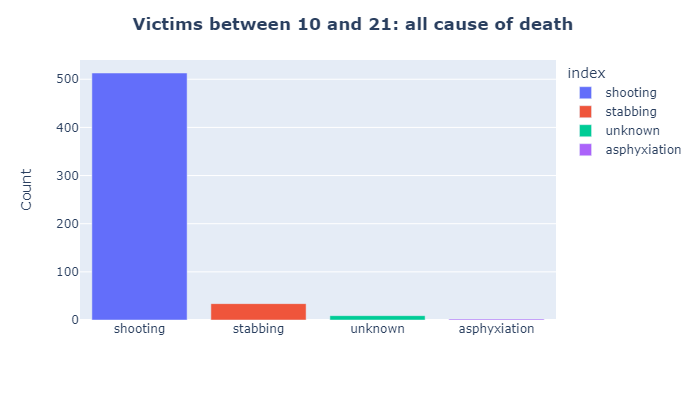

In [93]:
data = df_teen['cause'].value_counts()

fig = px.bar(data,
       y = data.values,
      x = data.index,
      color= data.index)

fig.update_layout(
    height=400,
    width=700,
    title='<b> Victims between 10 and 21: all cause of death</b>',
    title_x=0.5,
    xaxis_title=None,
    yaxis_title='Count'
    
)

fig.show("png")

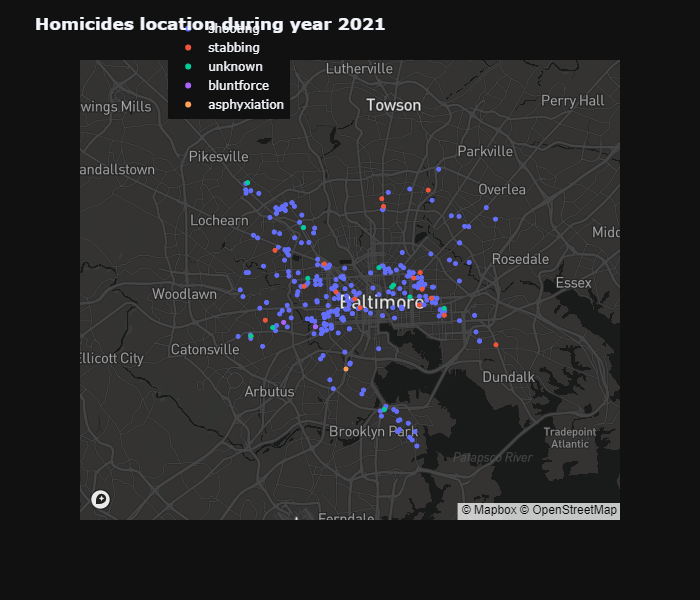

In [95]:
mapbox_access_token = 'pk.eyJ1IjoibGV3aXN3ZXJuZWNrIiwiYSI6ImNsMnMzYnA1OTA5dXgza25yazhhajh3NGsifQ.Z3CrpQqY0Xj_ZH3spiAiYQ'

fig = px.scatter_mapbox(
    df[df['year'] == 2021],
    lat="latitude",
    lon="longitude",
    color="cause",
    hover_data=df.columns,
    size_max=15,
    zoom=10,
    height=600
)

fig.update_layout(
    template='plotly_dark',
    title='<b>Homicides location during year 2021</b>',
    legend_orientation='h',
    legend_valign='middle',
    legend_x=.6,
    legend_y=1.1,
    legend_title=None
)

fig.update_layout(
    mapbox_style="dark",
    mapbox=dict(accesstoken=mapbox_access_token)
)

fig.show("png")

In [68]:
df.to_csv('data_baltimore.csv')